In [14]:
import pickle

with open ("trained_model.pkl", "rb") as file:
    model = pickle.load (file)

In [15]:
import pandas as pd

# Load the cleaned data
dataset_orig = pd.read_parquet('troop_movements_clean.parquet', engine='pyarrow')

y_pred = model.predict (dataset_orig)

print (y_pred)
print (type(y_pred))

['empire' 'empire' 'empire' ... 'resistance' 'empire' 'empire']
<class 'numpy.ndarray'>


In [16]:
dataset_post = dataset_orig.copy()

dataset_post["predictions"] = y_pred
print(dataset_post)

                  timestamp  unit_id     unit_type  location_x  location_y  \
0       2023-06-03 03:19:15   919214  tie_silencer         2.0         5.0   
1       2023-02-24 13:50:40  9467154  stormtrooper         9.0         0.0   
2       2023-03-29 19:54:55  6585778  tie_silencer         0.0         6.0   
3       2023-04-30 00:58:11  3878023  tie_silencer         4.0         2.0   
4       2023-04-10 22:00:26  5537117         at-st         6.0         8.0   
...                     ...      ...           ...         ...         ...   
999995  2023-05-03 18:48:56  3553240   tie_fighter         8.0         4.0   
999996  2023-05-25 13:45:35  1662636         at-at         0.0         3.0   
999997  2023-05-17 12:16:37  2362262   tie_fighter         6.0         8.0   
999998  2023-03-17 08:04:26  7669749   tie_fighter         9.0         3.0   
999999  2023-05-19 12:29:02  2187995         at-st         9.0         4.0   

        destination_x  destination_y    homeworld predictions  

In [18]:
from sklearn.model_selection import train_test_split

trainset = pd.read_csv('troop_movements.csv')

X = trainset.drop(columns=['empire_or_resistance'], axis=1)
y = trainset['empire_or_resistance']

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.2, random_state = 42)

In [19]:
from sklearn.metrics import accuracy_score

y_pred = model.predict (X_test)

accuracy = accuracy_score (y_test, y_pred)
print ("Accuracy:", accuracy)

Accuracy: 0.63


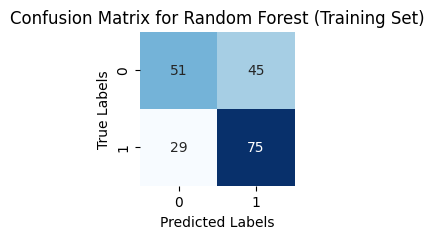

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the confusion matrix using the training set
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest (Training Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()